In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
# If code is in the drive, the following line works, otherwise add folder names
os.chdir('/content/drive/My Drive/Code/Data')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np
import re

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [3]:
with open('WTranslationsConcatOS.pkl', 'rb') as fp:
    concatted = pickle.load(fp)

concatted

,Sentence,Speaker,Next Speaker,Y,Sentence Length,NL translation
0,Hey - - sorry .,Rider,Kat,1,5,Hey sorry .
1,"I said , leave it !",Kat,Bianca,1,6,Ik zei: laat het!
2,Did you change your hair ?,Bianca,Chastity,1,6,Heb je je haar veranderd?
3,No .,Chastity,Girl,1,2,Nee .
4,Awesome shoes .,Girl,Miss Perky,1,3,Geweldige schoenen.
...,...,...,...,...,...,...
3437397,He gets dunked in the water again .,Peck,Peck,0,8,Hij wordt opnieuw in het water ondergedompeld.
3437398,Obviously not .,Peck,Peck,0,3,Duidelijk niet .
3437399,Dare I bring up.a sore subject .,Peck,Peck,0,7,Durf ik een pijnlijk onderwerp ter sprake te b...
3437400,Can we do a little business on the blackberry ...,Peck,Peck,0,11,Kunnen we wat zaken doen met de Blackberry-pri...


In [6]:
with open('WTranslationsOpenSubtitles.pkl', 'rb') as fp:
    dfs = pickle.load(fp)

#dfs

In [7]:
keys = list(dfs.keys())

In [8]:
%%time
mins = {}
means = {}
maxs = {}

scriptlengths = {}
numspeakers_perscript = {}

negsperscript = {}
posperscript = {}

for key in keys:
  df = dfs[key]
  dfsen = df['Sentence Length']

  mins[key] = dfsen.min()
  means[key] = dfsen.mean()
  maxs[key] = dfsen.max()

  scriptlengths[key] = len(df)
  numspeakers_perscript[key] = len(df.Speaker.unique())

  negsperscript[key] = len(df[df.Y == 0])
  posperscript[key] = len(df[df.Y == 1])


CPU times: user 10.3 s, sys: 46.8 ms, total: 10.3 s
Wall time: 10.6 s


In [9]:
# Create a dataframe to show maximum lenghts of sentences
maxdf = pd.DataFrame(pd.Series(maxs))
maxdf = maxdf.reset_index().rename(columns={'index':'File_name',0:'Maximum Length'})

# Create frame of scriptlengths
scriptlengthsdf = pd.DataFrame(pd.Series(scriptlengths))
scriptlengthsdf = scriptlengthsdf.reset_index().rename(columns={'index':'File_name',0:'Script Length'})

# Create frame of number of speakers per script
numspeakers_perscriptdf = pd.DataFrame(pd.Series(numspeakers_perscript))
numspeakers_perscriptdf = numspeakers_perscriptdf.reset_index().rename(columns={'index':'File_name',0:'Number of Speakers per Script'})

# Create frame negatives per script (same speaker)
negsperscriptdf = pd.DataFrame(pd.Series(negsperscript))
negsperscriptdf = negsperscriptdf.reset_index().rename(columns={'index':'File_name',0:'Negatives_ps'})

# Create frame positives per script (different speaker)
posperscriptdf = pd.DataFrame(pd.Series(posperscript))
posperscriptdf = posperscriptdf.reset_index().rename(columns={'index':'File_name',0:'Positives_ps'})
display(posperscriptdf)

,File_name,Positives_ps
0,10-Things-I-Hate-About-You-sentences.txt,717
1,12-and-Holding-sentences.txt,705
2,12-Monkeys-sentences.txt,728
3,12-sentences.txt,436
4,12-Years-a-Slave-sentences.txt,615
...,...,...
5971,Tremors-sentences.txt,619
5972,Tristan-and-Isolde-sentences.txt,465
5973,TRON-Legacy-sentences.txt,675
5974,TRON-sentences.txt,464


In [10]:
# REF https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
# Return dataframe with outliers and outlier values
def outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1
  threshold = 1.5

  left_outliers = Q1 - threshold * IQR
  right_outliers = Q3 + threshold * IQR

  return df[(df[col] < left_outliers) | (df[col] > right_outliers)], left_outliers, right_outliers

In [11]:
# Create plots
def plots(df,col,lx=None,rx=None):
  plt.figure(figsize=(6, 5))

  ax = sns.histplot(df[col], color='g', bins=100, kde=True)
  ax.set_title("Frequency Distribution of {}s".format(col))

  if lx != None:
    ax.axvline(x = lx)
  if rx != None:
    ax.axvline(x =rx)

  return ax

## Script Lengths

In [12]:
serie = scriptlengthsdf['Script Length']

print("Shortest script length: ",serie.min(),". Mean script length: ",serie.mean(),". Longest script length: ",serie.max(),". Most occurances script length: ",serie.mode()[0],".")
print("Median: ",serie.median())

display(scriptlengthsdf.sort_values('Script Length',ascending=False)[:15])

Shortest script length:  14 . Mean script length:  575.2011378848729 . Longest script length:  4248 . Most occurances script length:  61 .
Median:  492.0


,File_name,Script Length
110,Casino-sentences.txt,4248
1456,fd_the-office_02x99_deleted-scenes-from-season...,2978
41,Amadeus-sentences.txt,2949
5166,Arsenic-and-Old-Lace-sentences.txt,2921
5725,This-is-40-sentences.txt,2711
1965,Finding-Nemo-sentences.txt,2709
5749,Ordinary-People-sentences.txt,2489
2584,Bridesmaids-sentences.txt,2470
2597,Bonfire-of-the-Vanities-sentences.txt,2461
133,Clerks-sentences.txt,2460


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Script Lengths'}, xlabel='Script Length', ylabel='Count'>

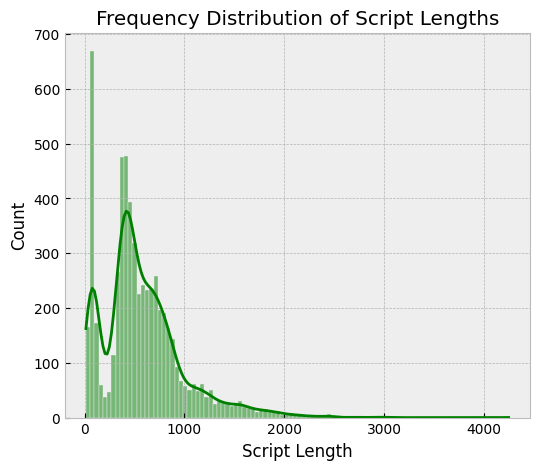

In [13]:
  print("Frequency distribution plot")
  display(plots(scriptlengthsdf,'Script Length'))

In [14]:
output = outliers(scriptlengthsdf,'Script Length')
outliers_df = output[0]
lxs = output[1]
rxs = output[2]

print("Left outliers are outside: ",lxs,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxs,".")
print('Percentage of the whole ',(len(scriptlengthsdf[scriptlengthsdf['Script Length'] > rxs])*100)/len(scriptlengthsdf),'%')

Left outliers are outside:  -254.5 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  1357.5 .
Percentage of the whole  5.35475234270415 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Script Lengths'}, xlabel='Script Length', ylabel='Count'>

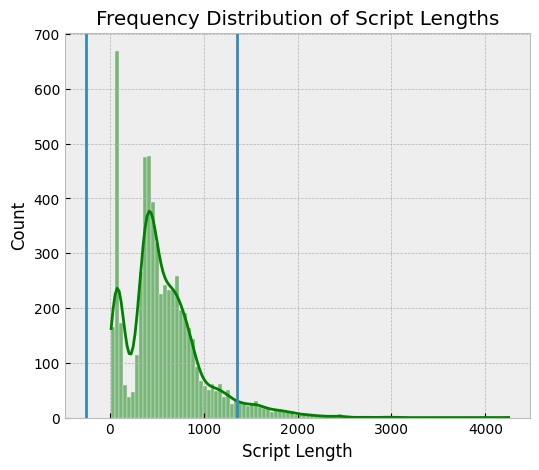

In [15]:
print("Frequency distribution plot with outlier boundaries")
ax = plots(scriptlengthsdf,'Script Length',lx=lxs,rx=rxs)
# Save plot to file
#plt.savefig("2WTLFrequencyscriptlengthswoutliers.png")
display(ax)

In [16]:
indices = outliers_df.index
scriptlengthsdf = scriptlengthsdf.drop(indices)

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Script Lengths'}, xlabel='Script Length', ylabel='Count'>

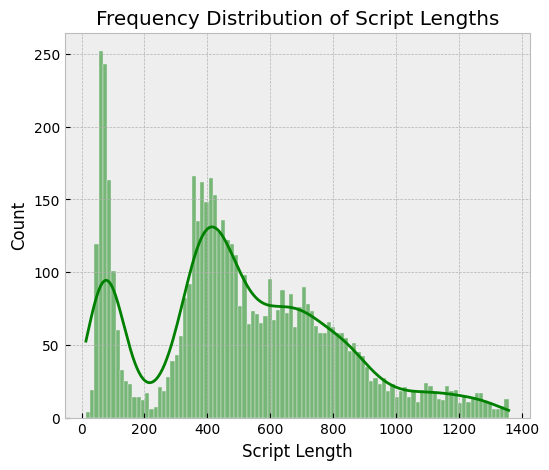

In [17]:
print("Frequency distribution plot without outliers")
display(plots(scriptlengthsdf,'Script Length'))

## Sentence Lengths

In [18]:
serie = concatted['Sentence Length']

print("Shortest sentence length: ",serie.min(),". Mean sentence length: ",serie.mean(),". Longest sentence length: ",serie.max(),". Most occurances sentence length: ",serie.mode()[0],".")
print("Median: ",serie.median())

display(concatted.sort_values('Sentence Length',ascending=False)[:15])

Shortest sentence length:  1 . Mean sentence length:  8.165236128913639 . Longest sentence length:  242 . Most occurances sentence length:  2 .
Median:  7.0


,Sentence,Speaker,Next Speaker,Y,Sentence Length,NL translation
2053947,( Ryan looks at him ) the next time you feel l...,Sandy,Marissa,1,242,( Ryan kijkt naar hem ) De volgende keer dat j...
2683135,the next time you feel like raisin your fist ...,Sandy,Sandy,0,232,De volgende keer dat je zin hebt om je vuist t...
3083912,""" Dear Dawson ... "" I 've been thinking about ...",Gretchen,Gretchen,0,230,"""Beste Dawson... ""Ik heb erover nagedacht wat ..."
2684134,Theresa and Ryan 's room - the alarm clock say...,Sandy,Sandy,0,184,Theresa en Ryan's kamer - de wekker geeft 6.00...
2054947,Theresa and Ryan 's room - the alarm clock say...,Sandy,Sandy,0,184,Theresa en Ryan's kamer - de wekker geeft 6.00...
1213182,"( and she 's a child again ) Anyway , my favor...",Annie,Annie,0,174,"(en ze is weer een kind) Hoe dan ook, mijn fav..."
1618141,"Sorry to call out of the blue but I have a , w...",Osbourne,Osbourne,0,166,"Sorry dat ik zomaar bel, maar ik heb een, nou ..."
3288489,Neil has his hands on the small of Julies back...,Kaitlin,Kaitlin,0,163,Neil heeft zijn handen op de kleine rug van Ju...
2609843,"Well , first off , he ate three pounds of unsw...",Luke,Lorelai,1,157,"Nou, eerst at hij drie pond ongezoete bakchoco..."
1148579,"This is a safe street , this is a safe buildin...",Rachel,Rachel,0,156,"Dit is een veilige straat, dit is een veilig g..."


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths'}, xlabel='Sentence Length', ylabel='Count'>

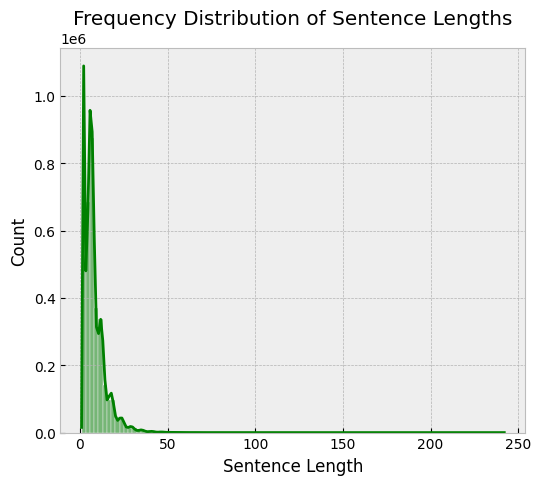

In [19]:
print("Frequency distribution plot")
display(plots(concatted,'Sentence Length'))

Frequency distribution plot of maximum sentence lengths per scripts


<Axes: title={'center': 'Frequency Distribution of Maximum Lengths'}, xlabel='Maximum Length', ylabel='Count'>

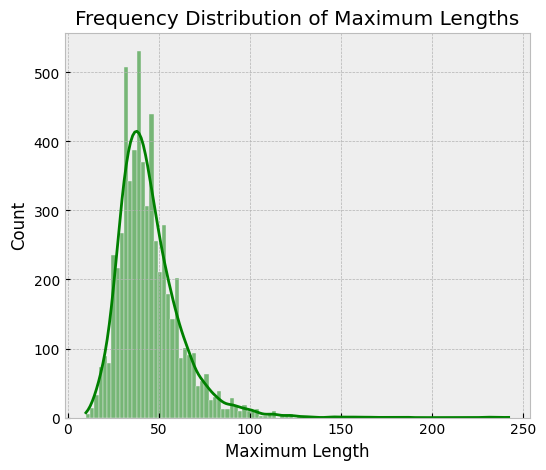

In [20]:
print("Frequency distribution plot of maximum sentence lengths per scripts")
display(plots(maxdf,'Maximum Length'))

In [21]:
concatted['Index'] = concatted.index
concatted

,Sentence,Speaker,Next Speaker,Y,Sentence Length,NL translation,Index
0,Hey - - sorry .,Rider,Kat,1,5,Hey sorry .,0
1,"I said , leave it !",Kat,Bianca,1,6,Ik zei: laat het!,1
2,Did you change your hair ?,Bianca,Chastity,1,6,Heb je je haar veranderd?,2
3,No .,Chastity,Girl,1,2,Nee .,3
4,Awesome shoes .,Girl,Miss Perky,1,3,Geweldige schoenen.,4
...,...,...,...,...,...,...,...
3437397,He gets dunked in the water again .,Peck,Peck,0,8,Hij wordt opnieuw in het water ondergedompeld.,3437397
3437398,Obviously not .,Peck,Peck,0,3,Duidelijk niet .,3437398
3437399,Dare I bring up.a sore subject .,Peck,Peck,0,7,Durf ik een pijnlijk onderwerp ter sprake te b...,3437399
3437400,Can we do a little business on the blackberry ...,Peck,Peck,0,11,Kunnen we wat zaken doen met de Blackberry-pri...,3437400


In [22]:
output = outliers(concatted,'Sentence Length')
outliers_df = output[0]
lxsl = output[1]
rxsl = output[2]

print("Left outliers are outside: ",lxsl,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxsl,".")
print("These are there; see plot.")
print('Percentage of the whole ',(len(concatted[concatted['Sentence Length'] > rxsl])*100)/len(concatted),'%')

Left outliers are outside:  -5.0 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  19.0 .
These are there; see plot.
Percentage of the whole  5.408823291544021 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths'}, xlabel='Sentence Length', ylabel='Count'>

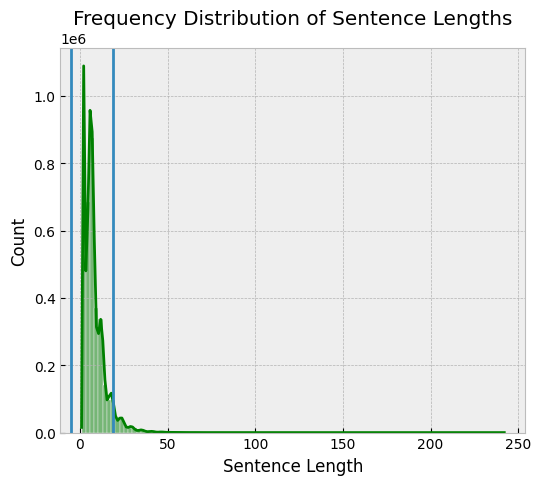

In [27]:
print("Frequency distribution plot with outlier boundaries")
ax2 = plots(concatted,'Sentence Length',lx=lxsl,rx=rxsl)
# Save plot to file
#plt.savefig("2WTLFrequencysentencelenghts.png")
display(ax2)

In [24]:
indices = outliers_df.index
inds = pd.DataFrame({'Index':indices})
#inds

In [25]:
div = int(len(concatted)/5)
div2 = div + div
div3 = div2 + div
div4 = div3 + div

div,div2,div3,div4

(687480, 1374960, 2062440, 2749920)

In [26]:
condiv1 = concatted[:div]
condiv2 = concatted[div:div2]
condiv3 = concatted[div2:div3]
condiv4 = concatted[div3:div4]
condiv5 = concatted[div4:]

In [28]:
condiv1 = condiv1.drop(inds.merge(condiv1, how='inner')['Index'].tolist())
#print(len(condiv1))

condiv2 = condiv2.drop(inds.merge(condiv2, how='inner')['Index'].tolist())
#print(len(condiv2))

condiv3 = condiv3.drop(inds.merge(condiv3, how='inner')['Index'].tolist())
#print(len(condiv3))

condiv4 = condiv4.drop(inds.merge(condiv4, how='inner')['Index'].tolist())
#print(len(condiv4))

condiv5 = condiv5.drop(inds.merge(condiv5, how='inner')['Index'].tolist())
#print(len(condiv5))


In [ ]:
#concatted['Sentence Length'].max(),lx,rx

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Sentence Lengths'}, xlabel='Sentence Length', ylabel='Count'>

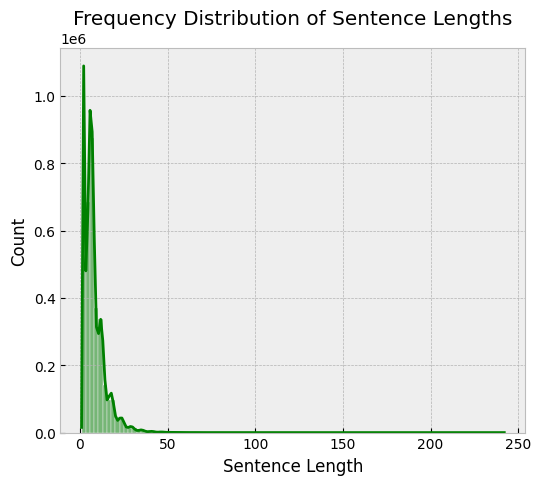

In [29]:
print("Frequency distribution plot without outliers")
display(plots(concatted,'Sentence Length'))

## Number of Speakers per Script

In [30]:
serie = numspeakers_perscriptdf['Number of Speakers per Script']

print("Least speakers per script: ",serie.min(),". Mean speakers per script: ",serie.mean(),". Most speakesr per script: ",serie.max(),". Most occurances speaker counts: ",serie.mode()[0],".")
print("Median",serie.median())
display(numspeakers_perscriptdf.sort_values('Number of Speakers per Script',ascending=False)[:15])

Least speakers per script:  1 . Mean speakers per script:  20.43155957161981 . Most speakesr per script:  151 . Most occurances speaker counts:  15 .
Median 17.0


,File_name,Number of Speakers per Script
2587,Broken-Arrow-sentences.txt,151
5751,Orphan-sentences.txt,147
2373,Gremlins-sentences.txt,136
2327,Gandhi-sentences.txt,134
110,Casino-sentences.txt,128
26,Airplane-2-The-Sequel-sentences.txt,126
5762,Pearl-Harbor-sentences.txt,124
5201,Coriolanus-sentences.txt,118
1972,Forrest-Gump-sentences.txt,117
2263,Mr-Deeds-Goes-to-Town-sentences.txt,114


Frequency distribution plot


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts'}, xlabel='Number of Speakers per Script', ylabel='Count'>

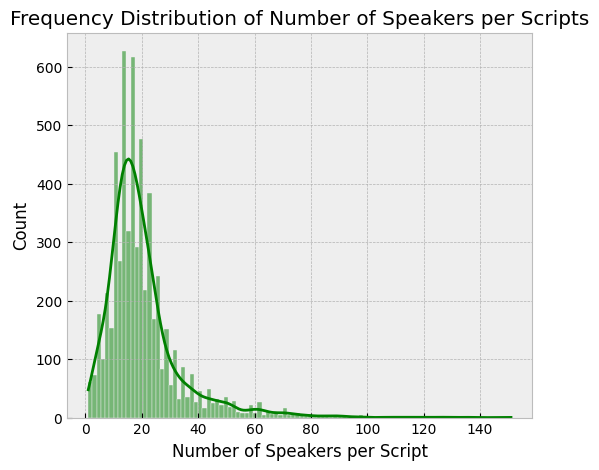

In [31]:
print("Frequency distribution plot")
display(plots(numspeakers_perscriptdf,'Number of Speakers per Script'))

In [32]:
output = outliers(numspeakers_perscriptdf,'Number of Speakers per Script')
outliers_df = output[0]
lxsp = output[1]
rxsp = output[2]

print("Left outliers are outside: ",lxsp,". Which are not present because the smallest number is 1. The right outliers are outside the boundary: ",rxsp,".")
print("These are there; see plot.")
print('Percentage of the whole ',(len(numspeakers_perscriptdf[numspeakers_perscriptdf['Number of Speakers per Script'] > rxsp])*100)/len(numspeakers_perscriptdf),'%')

Left outliers are outside:  -6.0 . Which are not present because the smallest number is 1. The right outliers are outside the boundary:  42.0 .
These are there; see plot.
Percentage of the whole  6.910977242302543 %


Frequency distribution plot with outlier boundaries


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts'}, xlabel='Number of Speakers per Script', ylabel='Count'>

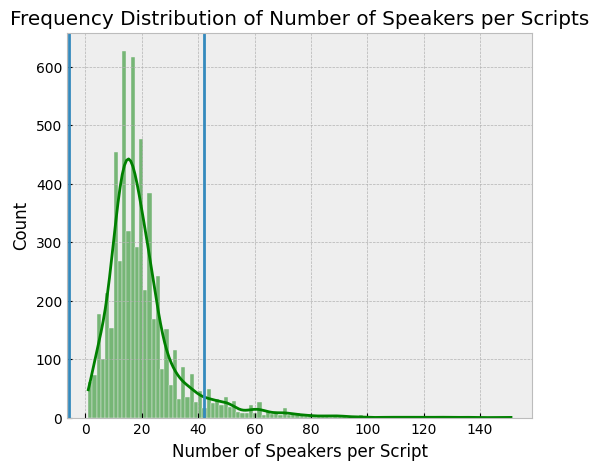

In [33]:
print("Frequency distribution plot with outlier boundaries")
display(plots(numspeakers_perscriptdf,'Number of Speakers per Script',lx=lxsp,rx=rxsp))
# Save plot to file
#plt.savefig("2WTranslationsConcatOS.pklFrequencynumspeakers.png")

In [ ]:
indices = outliers_df.index
numspeakers_perscriptdf = numspeakers_perscriptdf.drop(indices)

Frequency distribution plot without outliers


<Axes: title={'center': 'Frequency Distribution of Number of Speakers per Scripts DS1'}, xlabel='Number of Speakers per Script', ylabel='Count'>

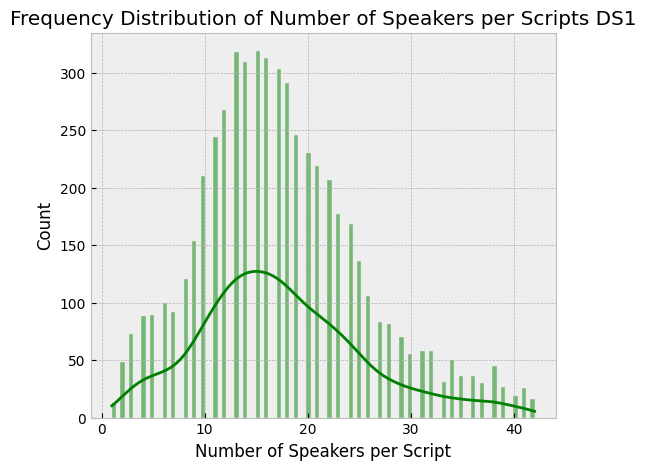

In [ ]:
print("Frequency distribution plot without outliers")
ax3 = plots(numspeakers_perscriptdf,'Number of Speakers per Script')
display(ax3)

## Distribution of Negatives and Positives

In [ ]:
print('Negatives: ',len(concatted[concatted.Y == 0]),'Positives: ',len(concatted[concatted.Y == 1]))
# Reasonably balanced

Negatives:  1680618 Positives:  1756784


<Axes: xlabel='Negatives_ps', ylabel='Count'>

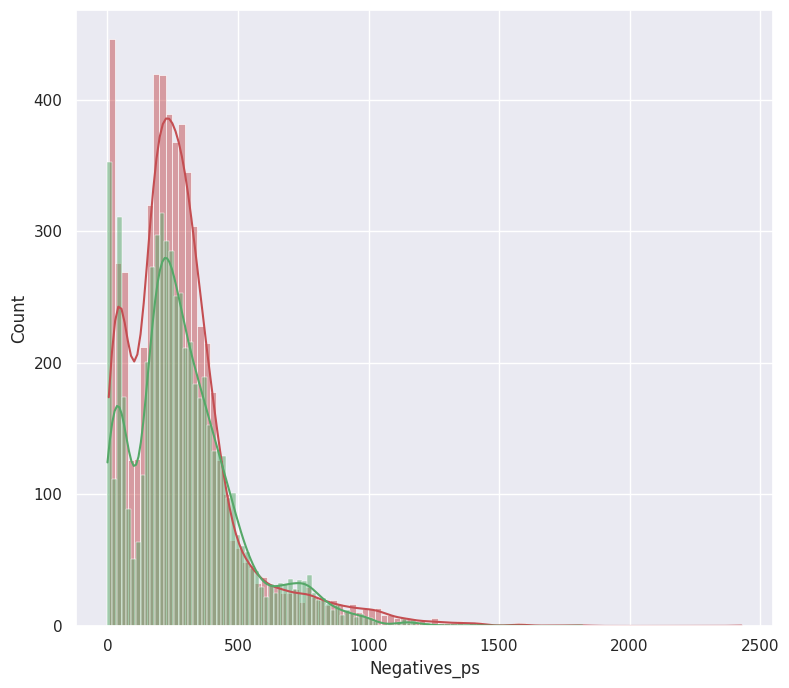

In [ ]:
plt.figure(figsize=(9, 8))

# Shows a distribution of yes or no on different speaker
ax = sns.histplot(negsperscriptdf['Negatives_ps'], color='r', bins=100, kde=True)
ax = sns.histplot(posperscriptdf['Positives_ps'], color='g', bins=100, kde=True)
ax